# Model Building

## Introduction 

Models describe our beliefs about how the world functions. A mathematical model is an abstract model that uses mathematical language to describe the behaviour of a specific real life system. Mathematical models are mostly used in the natural sciences and engineering fields such as: physics, biology, and electrical engineering, but they are also used in the social science fields such as: economics, sociology and political science. Physicists, engineers, computer scientists, and economists use mathematical models most extensively. In 1974, Pieter Eykhoff defined a mathematical model as "a representation of the essential aspects of an existing system (or a system to be constructed) which presents knowledge of that system in usable form". The advantages of using a mathematical language are uncountable.

1. Mathematics is a very precise language which helps us to formulate ideas and identify underlying assumptions. 
2. Mathematics is also a concise language, with well-defined rules for manipulations.
3. All the results that mathematicians have proved over hundreds of years are at our disposal
4. Mathematical models can take many forms, including but not limited to dynamical systems, statistical models, differential equations, or game theoretic models.

One of the most important features of mathematical models is that computers can be used to perform numerical calculations. There is a large amount of compromise in mathematical modelling. Most interacting systems in the real world are far too complex to be fully modeled mathematically. The first level of compromise is to identify the most important parts of the system and include these parts in the model, while the rest of the non-essential segments will be excluded. The second level of compromise relates to the amount of mathematical manipulation which is worth computing. Since mathematics has the potential to prove general results, these results depend on the form of equations used. Therefore it is in our best intrest to use equations in their simplest form without leaving any necessary information out. Small changes in the structure of equations may require extremely large changes in the mathematical methods. Since we are using computers to handle the model equations; we have to make sure that the results are easily translatable into useful information rather than a clutter of mathematical results.

We are going to discuss two specific types of models in this project. First, we are going to analyze free fall data using linear regresison and the least squares method. Linear regression is a linear approach to modeling the relationship between a scalar variable (or dependent variable) and one or more independent variables. Our case has only one independent variable and is called simple linear regression. The method of least squares is a standard approach in regression analysis to approximate the solution sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the unknowns made in the results of every single equation. It's most important application is in data fitting. The best fit in the least-squares sense minimizes the sum of squared residuals (a residual: the difference between an observed value, and the fitted value provided by a model). The second model we are going to discuss is the logistic map. Robert May popularized logistic maps in 1976 by publishing an article in nature magizine that talked about population growth and how it eventually evolves into choas. The problem was that not many people knew about this concept of choas which pushed them to learn about these logistic maps that involve a simple mathematical modle with very complex dynamics.

*source2

## Curve fitting 

Data analysis is a process of applying statistics to organize, represent, describe, evaluate, and interpret data. It is the process of evaluating data using analytical and logical reasoning to examine each component of the data provided. Data from various sources is gathered, reviewed, and then analyzed to form some sort of finding or conclusion. There are a variety of specific data analysis method, some of which include data mining, text analytics, business intelligence, and data visualizations. We are going to analyze free fall data by graphing fitted curves using linear regression and least squares method. The analytics process starts with data collection in which we have to identify the information we need for a particular analysis. 

We have 2 data sets which consist of the fall height 'y' and the time recorded to reach the ground 't' for two different balls (Steel and Plastic). We Import the data using the NumPy file I/O commands. We will set the delimiter to tab spacing using delimiter = ‘\t’ and we will need to skip the first few rows of text in the file to get to the data.


In [130]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Plastic = np.loadtxt('freefallPlastic.txt', delimiter ='\t', skiprows=4)
print(Plastic)

[[ 19.6      0.2025]
 [ 19.6      0.2031]
 [ 19.6      0.2036]
 [ 19.6      0.2033]
 [ 19.6      0.203 ]
 [ 25.7      0.2301]
 [ 25.7      0.2307]
 [ 25.7      0.2301]
 [ 25.7      0.2306]
 [ 25.7      0.2304]
 [ 30.2      0.2508]
 [ 30.2      0.2509]
 [ 30.2      0.251 ]
 [ 30.2      0.2508]
 [ 30.2      0.2509]
 [ 35.1      0.2707]
 [ 35.1      0.2713]
 [ 35.1      0.2716]
 [ 35.1      0.2716]
 [ 35.1      0.2714]
 [ 40.4      0.2895]
 [ 40.4      0.2898]
 [ 40.4      0.29  ]
 [ 40.4      0.2902]
 [ 40.4      0.2901]
 [ 46.2      0.3096]
 [ 46.2      0.3101]
 [ 46.2      0.3102]
 [ 46.2      0.31  ]
 [ 46.2      0.3097]]


In [5]:
Steel = np.loadtxt('freefallSteel.txt', delimiter ='\t', skiprows=4)
print(Steel)

[[ 19.8      0.2028]
 [ 19.8      0.2034]
 [ 19.8      0.2034]
 [ 19.8      0.2039]
 [ 19.8      0.2038]
 [ 25.8      0.2305]
 [ 25.8      0.2306]
 [ 25.8      0.2307]
 [ 25.8      0.2307]
 [ 25.8      0.2304]
 [ 30.4      0.2508]
 [ 30.4      0.2509]
 [ 30.4      0.2508]
 [ 30.4      0.2507]
 [ 30.4      0.2507]
 [ 35.6      0.2707]
 [ 35.6      0.2707]
 [ 35.6      0.2713]
 [ 35.6      0.271 ]
 [ 35.6      0.2711]
 [ 40.6      0.2897]
 [ 40.6      0.2896]
 [ 40.6      0.2897]
 [ 40.6      0.2896]
 [ 40.6      0.2894]
 [ 46.4      0.3094]
 [ 46.4      0.3095]
 [ 46.4      0.3097]
 [ 46.4      0.3095]
 [ 46.4      0.3097]]


We are going to manipulate the free fall equation for an object starting from rest which is given by: 

$$ y=\frac{1}{2}gt^2 $$

First we are going to plot the graph of y vs t

The slope for this graph is $ \frac{y}{t} $ = $ \frac{distance}{time} $ = $Velocity$. 

The velocity is increasing since the balls are accelerating at the constant rate of gravity given by $g\approx981\frac{cm}{s^2}$

Since we are plotting the velocity, which is increasing, the graph should be a parabola. Let's verify this for both balls.

Text(0.5,1,'y vs t Steel')

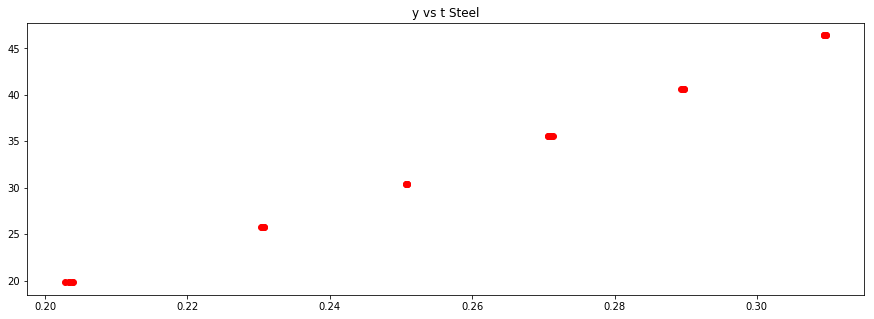

In [25]:
ySteel = Steel[:,0]
tSteel = Steel[:,1]
plt.figure(figsize=(15,5))
plt.plot(tSteel, ySteel, 'ro')
plt.title('y vs t Steel')

Text(0.5,1,'y vs t Plastic')

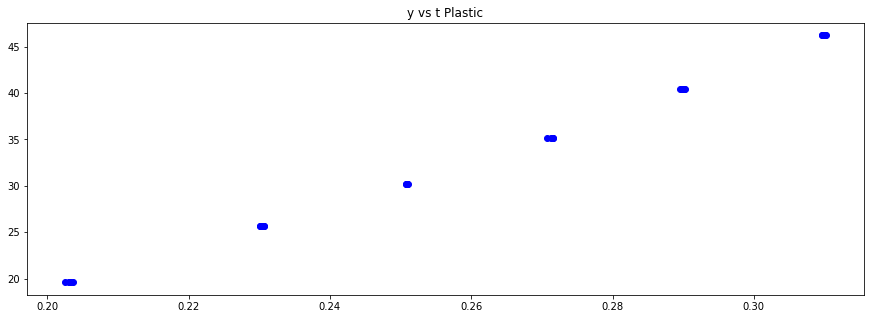

In [26]:
yPlastic = Plastic[:,0]
tPlastic = Plastic[:,1]
plt.figure(figsize=(15,5))
plt.plot(tPlastic, yPlastic, 'bo',)
plt.title('y vs t Plastic')

As we can see above, the graphs show a very subtle parabola because we don’t have much variation in drop heights.

Now let's plot the graph of $y$ vs $t^2$

The slope for this graph is $ \frac{y}{t^2} $ = $ \frac{distance}{{time}^2} $ = $Acceleration$. 

The acceleration is constant at the rate of gravity given by $g\approx981\frac{cm}{s^2}$

Since we are plotting the acceleration, which is constant, the graph should be a straight line. Let's verify this for both balls.

Text(0.5,1,'y vs $t^2$ Steel')

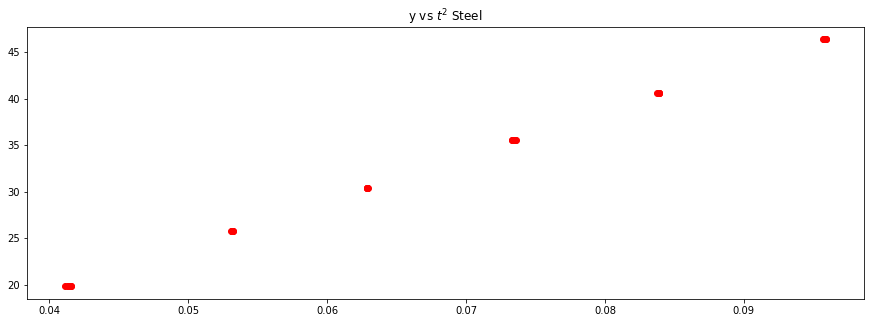

In [29]:
t2Steel = tSteel**2
plt.figure(figsize=(15,5))
plt.plot(t2Steel, ySteel, 'ro')
plt.title('y vs $t^2$ Steel')

Text(0.5,1,'y vs $t^2$ Plastic')

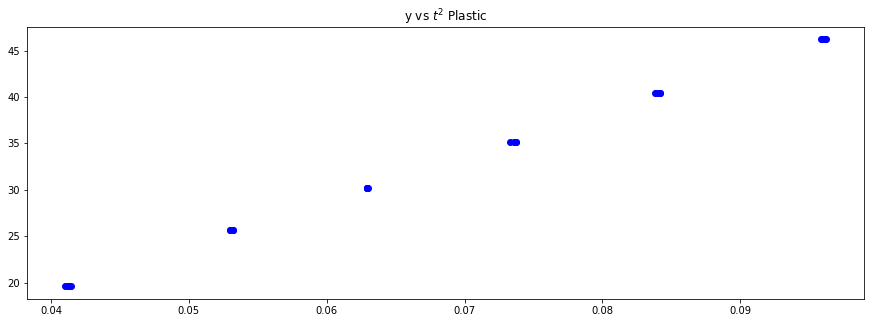

In [30]:
t2Plastic = tPlastic**2
plt.figure(figsize=(15,5))
plt.plot(t2Plastic, yPlastic, 'bo')
plt.title('y vs $t^2$ Plastic')

As we can see above, the graphs show a straight line which verifies our assumptions.

Although a metal ball of greater mass is dropped at the same time as a plastic ball of less mass, the only acceleration that initially acts on both balls is the acceleration caused by the gravitational force of the earth on both balls. In free fall ,where there is no air resistance, both balls would land on the ground at the same time and therefore have the same graphs.

### Linear regression and the least squares method

As I mentioned in the introduction; linear regression is a linear approach to modeling the relationship between a scalar variable (or dependent variable) and one or more independent variables. Our case has only one independent variable and is called simple linear regression. Linear regression has many practical uses; Most of their uses can be catagorized by 2 broad goals:

1. If the goal is prediction or error reduction, linear regression can be used to create and fit a predictive model to an observed data set of values. After developing such a model, if additional values are collected without an accompanying result, the fitted model can be used to make a prediction of the response.

2. If the goal is to make a connection or explain variation, linear regression can be applied to quantify the strength of the relationship between the variables, and specifically to determine whether they have a linear or non-linear relationship with the other varibale or not.

In our case, we want to create and fit a predictive model to the relationship between $y$ and $t^2$ during free fall. Linear regression models are often fitted using the least squares approach since they are very compatible together. 

The method of least squares is a standard approach in regression analysis to approximate the solution sets of equations in which there are more equations than unknowns. "Least squares" means that the overall solution minimizes the sum of the squares of the unknowns made in the results of every single equation. The best fit in the least-squares sense minimizes the sum of squared residuals (a residual: the difference between an observed value, and the fitted value provided by a model). This is best explained using an example

Let's say we plot a set of data points and we want to create and fit a predictive model (line of best fit) to represent the relationship between our two variables. We want to find the equation of a line that best fits this data.  

![1](https://www.spcforexcel.com/files/images/leastsquare.gif)
*(https://www.spcforexcel.com/files/images/leastsquare.gif)

Just by estimating where the line should go, we can predict that the line should go inbetween the closest we can get to an equal amount of points on either side. It doesn't necessarily have to pass through any of the data points. 

The least squares method works by looking at every data point and finding the vertical distance between the point and the line. This distance is known as the residual; It is the difference between an observed value and the fitted value given by the best fit line. Let's say the points are labeled from 1 to 9 and the distance between each point and the best fit line is $d1$ to $d9$. We are going to take these distances, square them, and add them all up.

$D=(d1)^2+(d2)^2+(d3)^2+(d4)^2+(d5)^2+(d6)^2+(d7)^2+(d8)^2+(d9)^2$

The idea is that the best fit line will have the smallest value of D since it has the least cumulative sum of square of the residuals, therefore making it the line that best represents the data since it is the closest to it.  This is why it is called the least squares method; since we are squaring the residuals and we want their sum to be the least possible value. 


Least-squares problems fall into two categories: linear or ordinary least squares and nonlinear least squares, depending on whether or not the residuals are linear in all unknowns. Ordinary least squares (OLS) is the most common method. The OLS method minimizes the sum of squared residuals, and leads to a closed-form expression for the estimated value of the unknown linear model 

Straight line: $f(x,{\beta })=\beta _{0}+\beta _{1}x$

Quadratic: $f(x,{\beta })=\beta _{0}+\beta _{1}x+\beta _{2}x^2$

Where $\beta$ represents the parameters of the predictive model

$\beta_0$ represents the y-intercept and $\beta_1$ represents the slope of the best fit line

We can calculate $\beta$ by augmenting the our first variable with ones in order to allow us to carry out vector multiplicaiton between our variables. 

Using $$Ax = B,$$ 

where $A, B$ and $x$ are matrices, we want to solve for $x$ and it will be written as 

$$x = A^{-1}B.$$

Therefore, we can calculate $\beta$ for both balls using np.linalg.solve(A, b) which solves Ax = b for x.

$$(X^T.X)\beta = X^T.y$$

$$\beta = (X^TX)^{-1}X^T{y}$$

*source1,3

In [32]:
n = len(Steel)

XSteel = np.array([np.ones(n), Steel[:,1]**2]).T
print(XSteel)

[[ 1.          0.04112784]
 [ 1.          0.04137156]
 [ 1.          0.04137156]
 [ 1.          0.04157521]
 [ 1.          0.04153444]
 [ 1.          0.05313025]
 [ 1.          0.05317636]
 [ 1.          0.05322249]
 [ 1.          0.05322249]
 [ 1.          0.05308416]
 [ 1.          0.06290064]
 [ 1.          0.06295081]
 [ 1.          0.06290064]
 [ 1.          0.06285049]
 [ 1.          0.06285049]
 [ 1.          0.07327849]
 [ 1.          0.07327849]
 [ 1.          0.07360369]
 [ 1.          0.073441  ]
 [ 1.          0.07349521]
 [ 1.          0.08392609]
 [ 1.          0.08386816]
 [ 1.          0.08392609]
 [ 1.          0.08386816]
 [ 1.          0.08375236]
 [ 1.          0.09572836]
 [ 1.          0.09579025]
 [ 1.          0.09591409]
 [ 1.          0.09579025]
 [ 1.          0.09591409]]


In [33]:
XPlastic = np.array([np.ones(n), Plastic[:,1]**2]).T

In [34]:
def normalEquationSolver(X, y):
    """
    This function solves the normal equations for linear regression using
    least squares method by taking in the values of X and y. Here, y is the 
    target and X is constructed using the model as X_ij = phi_j(x_i). 
    The output is an array containing the best fit parameters for the model
    using the data.
    
    Keywords:
    X: this is the matrix containing the values (phi_j(x_i))
    y: this matrix contains the values of y which the model tries to predict
    beta: this is the output of the function. It contains the parameters
          of the fitting model in an array.
    
    """
    import numpy as np
    
    # Solve the matrix equation (X'X)beta = X'y for beta 
    # where ' means transpose
    
    beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    
    return beta

$\beta_0$ and $\beta_1$ are the coefficients in the linear fit between $y$ and $t^2$

$y=\beta _{0}+\beta _{1}t^2$

$\beta_0$ represents the y-intercept we expect it to be a small number 

$\beta_1$ represents the slope of the best fit line

By manipulating $ y=\frac{1}{2}gt^2 $

$$\frac{y}{t^2}=\frac{g}{2}$$

Since slope $=\frac{y}{t^2}=\beta_1$

We expect $$\beta_1=\frac{g}{2}$$

and $$2\beta_1=g$$

In [37]:
betaSteel = normalEquationSolver(XSteel,ySteel)
print(betaSteel)

[ -2.41302530e-01   4.87245487e+02]


In [38]:
betaPlastic = normalEquationSolver(XPlastic,yPlastic)
print(betaPlastic)

[ -1.55994473e-01   4.82101051e+02]


Let's verify our results by extracting the value of g from the data using our parameters for both balls

$$g=2\beta_1$$

In [41]:
gSteel = 2*betaSteel[1]
print(gSteel)

974.4909731


In [42]:
gPlastic = 2*betaPlastic[1]
print(gPlastic)

964.202102022


We can see that our values are almost the same for $\beta_{Steel}$ and $\beta_{Plastic}$ and are correct since we know that $g\approx981\frac{cm}{s^2}$

Finally let's plot the data $y$ vs $t^2$ and the fits for both the balls and demonstrate that the fits work.

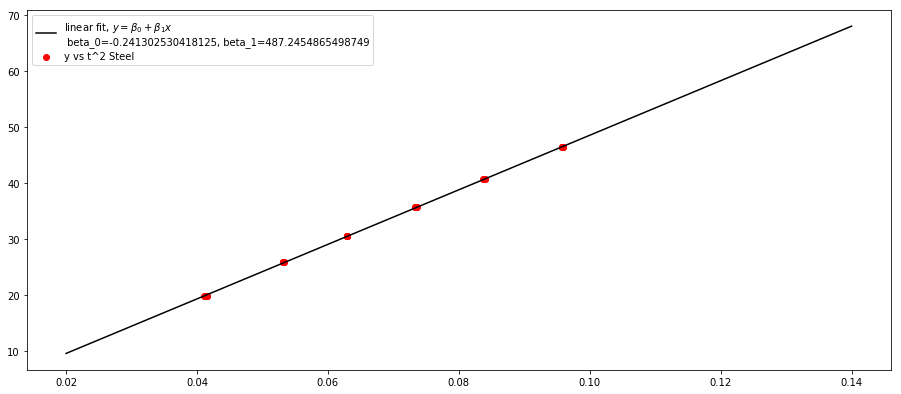

In [53]:
# plot the line to check that we get something reasonable

fig, ax = plt.subplots(figsize=(12,5))

ax = fig.add_axes([0,0,1,1])

ax.scatter(t2Steel, ySteel, color='red', label="y vs t^2 Steel")

# Plot the fit

xx = np.linspace(0.02,0.14,10)
yy = betaSteel[0] + betaSteel[1]*xx

fitLabel = "linear fit, $y = \\beta_0 + \\beta_1 x$\n beta_0={}, beta_1={}".format(betaSteel[0], betaSteel[1])
ax.plot(xx, yy,  'k', label = fitLabel)
ax.legend()

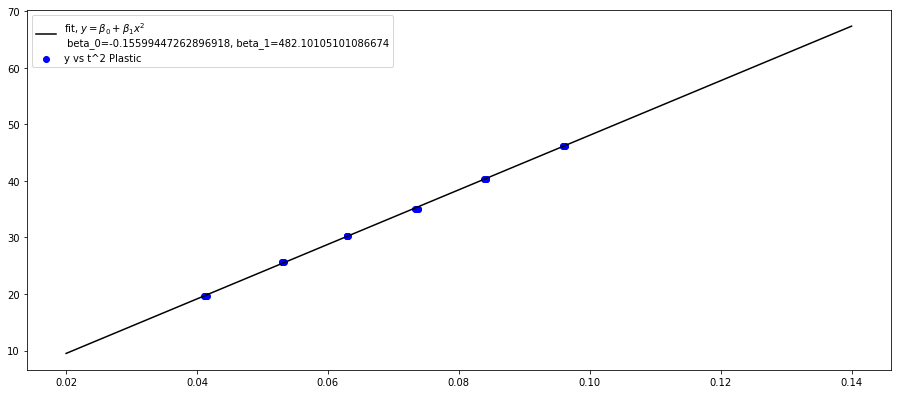

In [54]:
# plot the line to check that we get something reasonable

fig, ax = plt.subplots(figsize=(12,5))

ax = fig.add_axes([0,0,1,1])

ax.scatter(t2Plastic, yPlastic, color='blue', label="y vs t^2 Plastic")

# Plot the fit

xx = np.linspace(0.02,0.14,10)
yy = betaPlastic[0] + betaPlastic[1]*xx

fitLabel = "fit, $y = \\beta_0 + \\beta_1 x^2$\n beta_0={}, beta_1={}".format(betaPlastic[0], betaPlastic[1])
ax.plot(xx, yy,  'k', label = fitLabel)
ax.legend()

The fit works perfectly for both balls which can finally verify that all our previous calculations are correct

*source4,5

## Mayfly model

Robert May popularized logistic maps in 1976 by publishing an article in nature magizine that talked about population growth and how it eventually evolves into choas. The problem was that not many people knew about this concept of choas which pushed them to learn about these logistic maps that involve a simple mathematical modle with very complex dynamics. The fact that May's simple population growth equation contains unexpectedly rich and complex behavior into how populations breed made it a very interesting topic to be further researched and developed. This equation is a logistic map which is basically function in which you have an input and output and it maps one value to another one. In our case, it predicts what next years population is going to be for a community of species. The model is a discrete time model and the population of a species is updated iteratively in the following manner

$$y_{n+1}=by_n(1-y_n)$$

Where

$y_n$ is the exisiting population level at the nth iteration which kept in the interval $0 ≤ y ≤ 1$

$y_{n+1}$ is the next year's population 

Since $y$ is kept in the interval $0 ≤ y ≤ 1$, $y=0$ represents a dead population and $y=1$ represents a full population

$b$ is a model parameter which represents the fertility rate that can be varied between $0 ≤ b ≤ 4$

Since $b$ is varied between $0 ≤ b ≤ 4$, if $b=0$ then the population is not breeding at all and if $b=4$ then the population is breeding at it's maximum rate

Biologist modeled different populations is by changing $b$. 

We are going to iterate the function, which means we are going to get an answer and then plug it back in to get another answer and so forth. If the previous year's population is high, you would expect the next one to be high since you are multiplying by the previous year's population $y_n$. But if the population is too high, then the next generation is going to run out of food and that is why you also multiply by $(1-y_n)$. 

So $y_n$ is life (breeding) and $(1-y_n)$ is death (starvation). 

Let's do an example. Take $y_n=0.5$ and $b=2.3$

$y_{n+1}=2.3\times0.5(1-0.5)$ 

$y_{n+1}= 0.575$ Population has gone up from $y_n=0.5$ to $y_{n+1}= 0.575$ since our fertility rate is above the midpoint. Let's move onto the next iteration

$y_{n+2}=2.3\times0.575(1-0.575)$

$y_{n+2}= 0.5621$ Population has dropped from $y_{n+1}= 0.575$ to $y_{n+2}= 0.562$ which means we have gone high enough in the population to the point where competition starts kicking in and the population can't fully sustain itself and therefore decreases.

$y_{n+3}=2.3\times0.5621(1-0.5621)$

$y_{n+3}= 0.5661$ Population bounces back up 

$y_{n+4}= 0.5649$ Population bounces down

$y_{n+5}= 0.5653$ Population bounces up

$y_{n+6}= 0.5652$ Population keeps bouncing up and down until it eventually stablizes at a specific population

$y_{n+7}= 0.5652$ is the fixed point for $b=2.3$

This is called a fixed point. It is where the species are breeding and dying at the same rate which means our population is at equilibrium. This shows how populations stablize in real life.

At equilibrium, if the system starts at a certain point, it remains at that certain point. Therefore 
$y_{n+1}=y_n=y$ at the system's fixed points

Using this information 

$$y=by(1-y)$$

Dividing by $by$ on both sides

$$\frac{1}{b}=1-y$$

$$y=1-\frac{1}{b}$$

When $0 ≤ b ≤ 1 $, the fixed point $1-\frac{1}{b}$ saturates at either a negaitve number or 0. Since y can't be negative we assume that a negative number represents 0. It makes sense for the population to saturate at 0 when $0 ≤ b ≤ 1 $ since a low fertility rate can't keep up with the death rate which causes the population to eventually die off

Therefore we get the fixed points to be $1-\frac{1}{b}$ and $0$

The fixed point $y=0$ is is stable for $0 ≤ b ≤ 1 $

The fixed point $y=1-\frac{1}{b}$ is stable for $1 ≤ b ≤ 3 $

We can show that for $0 ≤ b ≤ 1 $ the population dies off ($y=0$) and for $1 ≤ b ≤ 3 $ the popoulation saturates at $y=1-\frac{1}{b}$ 

Using the "mayfly" function which takes $y$,$n$, and $b$ as input and returns an array containing the populations at the n time iterations. We can also graphically see the results by plotting the output


*source6,7,8

In [56]:
def mayfly(b=2, yInit=0.01, n=10):
    """
    Function returns the time series of population for n iterations as 
    a numpy array. 
    
    Keywords:
    b: parameter in the model
    yInit: initial population
    n: number of iterations to be performed
    out: Numpy array containing the populations at the n time iterations
    
    """
    # Initialization
    out = np.zeros((n,1))
    y = yInit
    
    # Set up loop for the iterations
    for i in range(n):
        out[i] = y
        y = b*(1-y)*y
        
    # Send back output and exit
    return out

In [111]:
b1 = 0.2
yInit1 = 0.7
n1 = 25

pop1 = mayfly(b1, yInit1, n1)
print(pop1)

[[  7.00000000e-01]
 [  4.20000000e-02]
 [  8.04720000e-03]
 [  1.59648851e-03]
 [  3.18787948e-04]
 [  6.37372644e-05]
 [  1.27466404e-05]
 [  2.54929558e-06]
 [  5.09857817e-07]
 [  1.01971511e-07]
 [  2.03943002e-08]
 [  4.07885996e-09]
 [  8.15771988e-10]
 [  1.63154397e-10]
 [  3.26308795e-11]
 [  6.52617590e-12]
 [  1.30523518e-12]
 [  2.61047036e-13]
 [  5.22094072e-14]
 [  1.04418814e-14]
 [  2.08837629e-15]
 [  4.17675257e-16]
 [  8.35350515e-17]
 [  1.67070103e-17]
 [  3.34140206e-18]]


Text(0.5,1,'Mayfly population time series, b = 0.2, $y_0$ = 0.7')

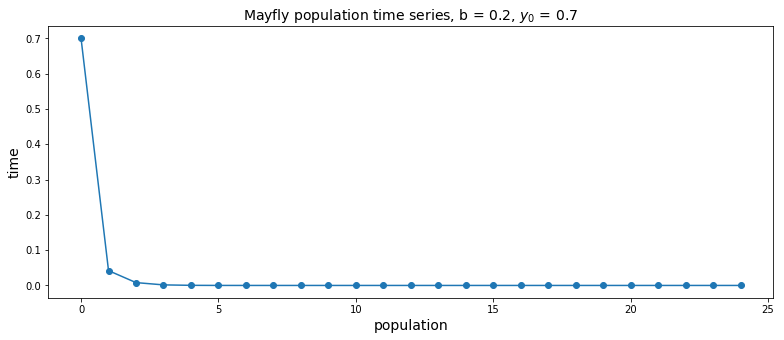

In [112]:
fig, axes = plt.subplots(figsize = (13,5))

axes.plot(range(n1), pop1, marker = '.', markersize = 12)
axes.set_xlabel("population", fontsize=14)
axes.set_ylabel("time", fontsize=14)
titleString = "Mayfly population time series, b = {}, $y_0$ = {}".format(b1, yInit1)
axes.set_title(titleString, fontsize=14)

We can see that for $b=0.2$ which is $0 ≤ b ≤ 1 $, that the population is approaches $y=0$ which means it is dies off


In [113]:
b2 = 1.7
yInit2 = 0.6
n2 = 25

pop2 = mayfly(b2, yInit2, n2)
print(pop2)

[[ 0.6       ]
 [ 0.408     ]
 [ 0.4106112 ]
 [ 0.41141639]
 [ 0.41166001]
 [ 0.41173328]
 [ 0.41175528]
 [ 0.41176188]
 [ 0.41176386]
 [ 0.41176445]
 [ 0.41176463]
 [ 0.41176468]
 [ 0.4117647 ]
 [ 0.4117647 ]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]
 [ 0.41176471]]


Text(0.5,1,'Mayfly population time series, b = 1.7, $y_0$ = 0.6')

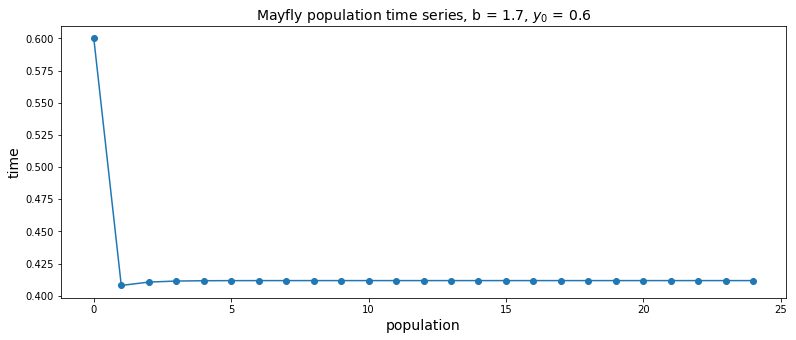

In [114]:
fig, axes = plt.subplots(figsize = (13,5))


axes.plot(range(n2), pop2, marker = '.', markersize = 12)
axes.set_xlabel("population", fontsize=14)
axes.set_ylabel("time", fontsize=14)
titleString = "Mayfly population time series, b = {}, $y_0$ = {}".format(b2, yInit2)
axes.set_title(titleString, fontsize=14)

Here we can clearly see that for $b=1.7$ which is $1 ≤ b ≤ 3 $, that the population saturates 
at $y=1-\frac{1}{b}=1-\frac{1}{1.7}=0.41176471$. 


### Bifurcation and choas

If you pick a fertility rate $3 ≤ b ≤ 4 $, we start to observe some strange behavior. 

Let's plot the graph for $b=3.2$ and see what happens

In [115]:
b3 = 3.2
yInit3 = 0.1
n3 = 25

pop3 = mayfly(b3, yInit3, n3)
print(pop3)

[[ 0.1       ]
 [ 0.288     ]
 [ 0.6561792 ]
 [ 0.72194578]
 [ 0.64236822]
 [ 0.73514013]
 [ 0.62306919]
 [ 0.75153272]
 [ 0.59754013]
 [ 0.76955495]
 [ 0.5674884 ]
 [ 0.78542501]
 [ 0.53930421]
 [ 0.79505657]
 [ 0.52141318]
 [ 0.79853272]
 [ 0.51481028]
 [ 0.7992981 ]
 [ 0.51334608]
 [ 0.79943002]
 [ 0.51309332]
 [ 0.79945141]
 [ 0.51305233]
 [ 0.79945484]
 [ 0.51304576]]


Text(0.5,1,'Mayfly population time series, b = 3.2, $y_0$ = 0.1')

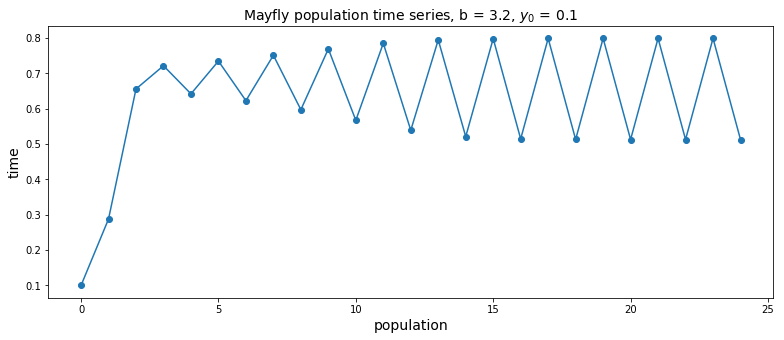

In [116]:
fig, axes = plt.subplots(figsize = (13,5))


axes.plot(range(n3), pop3, marker = '.', markersize = 12)
axes.set_xlabel("population", fontsize=14)
axes.set_ylabel("time", fontsize=14)
titleString = "Mayfly population time series, b = {}, $y_0$ = {}".format(b3, yInit3)
axes.set_title(titleString, fontsize=14)

The population starts off by increasing, which is expected, since we have a high feritily rate. After a couple iterations, competition starts kicking in and the population starts dropping down and then it goes up again and then down but this time the population doesn't stabilize at single fixed point like it between $1 ≤ b ≤ 3$, instead it starts oscillating between two fixed points and keep bouncing up and down between them. This is called bifurcation: the division of something into two branches or parts.

*source6,7,8

Now let's increase $b=3.56$ and see what happens

In [123]:
b4 = 3.56
yInit4 = 0.1
n4 = 35

pop4 = mayfly(b4, yInit4, n4)
print(pop4)

[[ 0.1       ]
 [ 0.3204    ]
 [ 0.77516807]
 [ 0.62044582]
 [ 0.83835439]
 [ 0.48243806]
 [ 0.88890202]
 [ 0.35156858]
 [ 0.81156649]
 [ 0.54441771]
 [ 0.88297636]
 [ 0.36785163]
 [ 0.82783104]
 [ 0.50739544]
 [ 0.88980529]
 [ 0.34906452]
 [ 0.8088978 ]
 [ 0.55031246]
 [ 0.88098842]
 [ 0.37325826]
 [ 0.83281405]
 [ 0.49567591]
 [ 0.88993344]
 [ 0.34870882]
 [ 0.80851508]
 [ 0.55115366]
 [ 0.88068456]
 [ 0.37408219]
 [ 0.83355515]
 [ 0.49391783]
 [ 0.88986831]
 [ 0.34888963]
 [ 0.80870973]
 [ 0.55072595]
 [ 0.88083968]]


Text(0.5,1,'Mayfly population time series, b = 3.56, $y_0$ = 0.1')

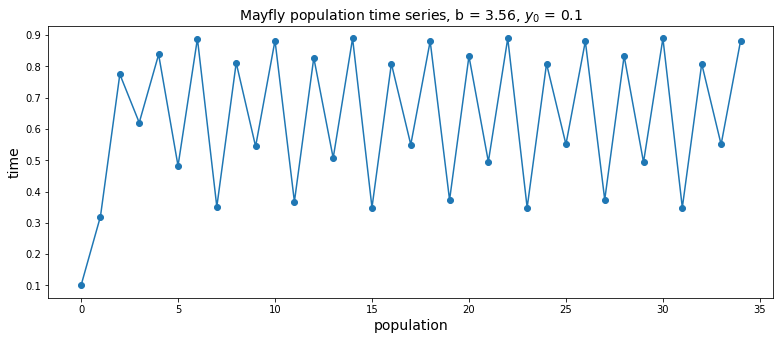

In [124]:
fig, axes = plt.subplots(figsize = (13,5))


axes.plot(range(n4), pop4, marker = '.', markersize = 12)
axes.set_xlabel("population", fontsize=14)
axes.set_ylabel("time", fontsize=14)
titleString = "Mayfly population time series, b = {}, $y_0$ = {}".format(b4, yInit4)
axes.set_title(titleString, fontsize=14)

Here we start off with similair results but it doesn't only oscillate between two fixed points, instead the two already bifurcated points bifurcate again for a second time and cause the population to cycle between four fixed point and oscillate between them. 

Biologists were facinated by the fact that you can model a complicated 4-year cycle population by just one paramter $b$, but what they didn't know is what happens if you go above $b=3.56$. Let's try it

In [125]:
b5 = 3.7
yInit5 = 0.1
n5 = 100

pop5 = mayfly(b5, yInit5, n5)

Text(0.5,1,'Mayfly population time series, b = 3.7, $y_0$ = 0.1')

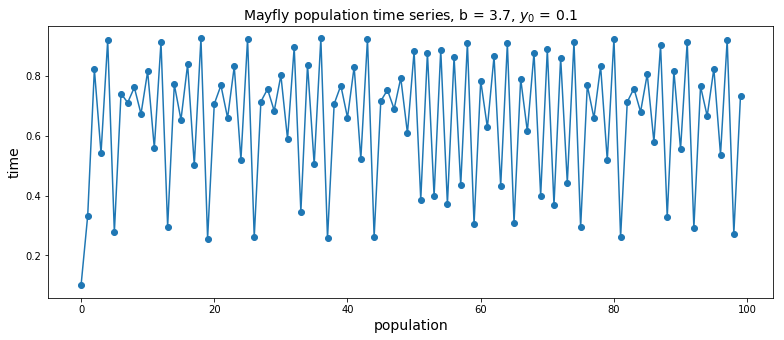

In [122]:
fig, axes = plt.subplots(figsize = (13,5))


axes.plot(range(n5), pop5, marker = '.', markersize = 12)
axes.set_xlabel("population", fontsize=14)
axes.set_ylabel("time", fontsize=14)
titleString = "Mayfly population time series, b = {}, $y_0$ = {}".format(b5, yInit5)
axes.set_title(titleString, fontsize=14)

Our graph seems to be all over the place. There’s no way to detect, either statistically or
by looking at the figure, any such correlation between the time and the population. This is what's known as chaotic behavior. 

*source6,7,8

Let's define a function mayfly2 that gives us a sequence of populations at different iterations.

In [141]:
def mayfly2(b=np.linspace(0, 4, 50), yInit=np.matlib.repmat(0.01, 50,1), n=50):
    """
    Function returns the time series of population for n iterations as 
    a numpy array. 
    
    Keywords:
    b: NumPy array containing parameters of the mayfly model
    yInit: initial populations as an array the size of b for each value of b
    n: number of iterations to be performed
    out: Numpy 2D array containing the populations. 
    The columns correspond to different b and rows correspond to different time iterations.
    
    """
    # Initialization
    m = len(b)
    out = np.zeros((n,m))
    
    # We need to convert the column yInit into a row
    y = yInit.T
    
    # Set up loop for the iterations
    for i in range(n):
        # Each row corresponds to the new time iteration, each of the the b values can be treated independently
        out[i, :] = y
        y = b*(1-y)*y
        
    # Send back output and exit
    return out
    

Let's plot multiple graphs for differet values of $b$ so that we can compare them side by side

In [142]:
b = np.linspace(0, 4, 28)
yInit = np.matlib.repmat(0.01, 28, 1) # must be the same size as b
n = 100
pop1 = mayfly2(b, yInit, n)

In [144]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

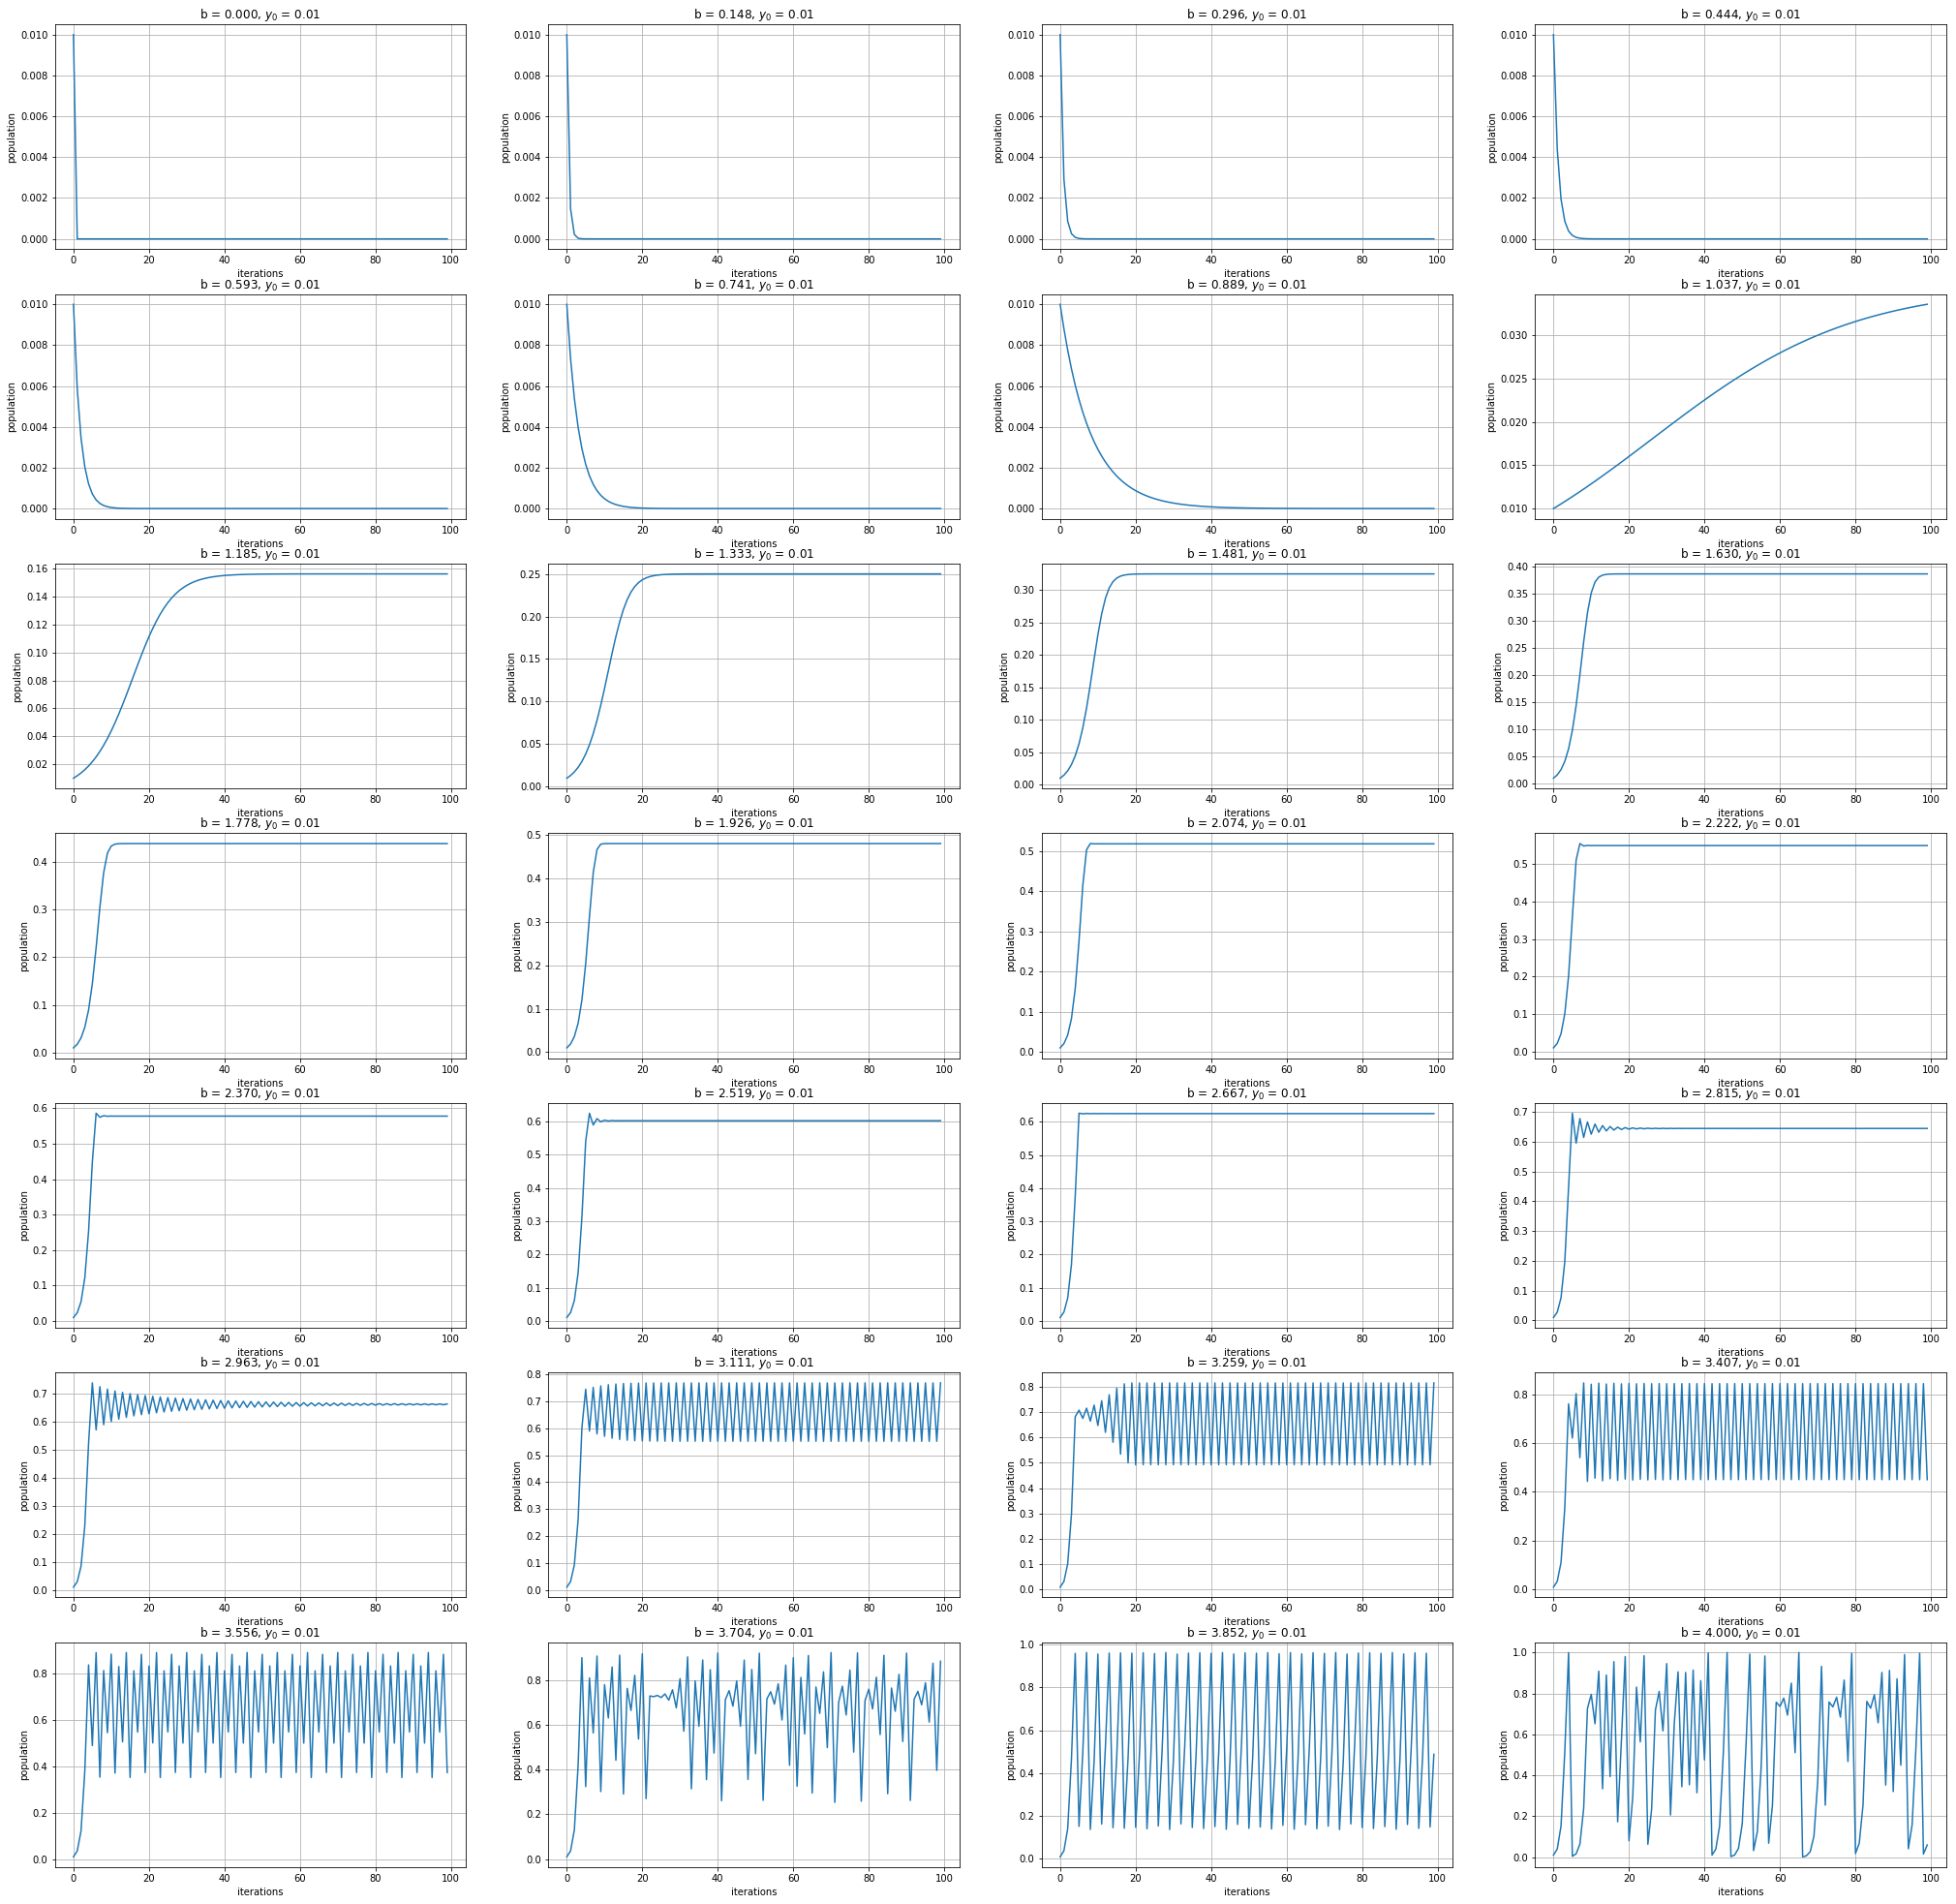

In [145]:
# Set up grid canvas
rows, cols = 7, 4
i = 0
fig, axes = plt.subplots(rows, cols, figsize=(35,35))
#plt.figure(figsize=(20,20))
for j in range(0, rows):
    for k in range(0, cols):
        axes[j][k].plot(pop1[:, i].T)
        # Remove axes ticks since if they seem to be interfering
        #axes[a][b].set_xticks([])
        #axes[a][b].set_yticks([])
        axes[j][k].set_xlabel("iterations")
        axes[j][k].set_ylabel("population")
        titleString = "b = {:.3f}, $y_0$ = {}".format(b[i], yInit[i, 0]) 
        axes[j][k].set_title(titleString)
        axes[j][k].grid(True)
        i += 1

Here we can see how changing the value of $b$ effects the population 

$0 ≤ b ≤ 1 $ corresponds to the population dying off $y=0$

$1 ≤ b ≤ 3 $ corresponds to the population saturating to $y=1-\frac{1}{b}$

$3 ≤ b ≤ 3.2 $ corresponds to the population bifurcating into a two cycle 

$3.2 ≤ b ≤ 3.56 $ corresponds to the population bifurcating into a four cycle

$3.56 ≤ b ≤ 4 $ corresponds to the population showing choatic behavior

![2](https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-model-line.png?w=683&ssl=1)
*(https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-model-line.png?w=683&ssl=1)

The general behavior of the logistic map depends critically, as we’ve seen, on the value of $b$. So we’d like to produce a graph that captures the change in behavior of the population as a function of the $b$.

A bifurcation diagram graphs the population as a function of $b$ which corresponds to $y$ vs $b$

Let's create a bifurcation diagram showing $y$ vs $b$ for late times by discarding the beginnning majority of
iterations in the population time series

This is an image of how the bifurcation diagram looks for all values of $0 ≤ b ≤ 4 $ 

![3](https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-full1.png?w=613&ssl=1)
*(https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-full1.png?w=613&ssl=1)

Here can see that 

$0 ≤ b ≤ 1 $ corresponds to the population dying off $y=0$

$1 ≤ b ≤ 3 $ corresponds to the population saturating to $y=1-\frac{1}{b}$

$3 ≤ b ≤ 3.2 $ corresponds to the population bifurcating into a two cycle 

$3.2 ≤ b ≤ 3.56 $ corresponds to the population bifurcating into a four cycle

$3.56 ≤ b ≤ 4 $ corresponds to the population showing choatic behavior

We want to focus on what happens between $2.4 ≤ b ≤ 4 $ since that is when the system goes to choas

In [163]:
b6 = np.linspace(2.4,4,1000)
n6 = 1000
yi6 = np.matlib.repmat(0.01, len(b6), 1)

pop6 = mayfly2(b6, yi6 ,n6)

In [164]:
p6 = np.delete(pop6,range(0,990),0).T 

Text(0.5,1,'Bifurcation diagram')

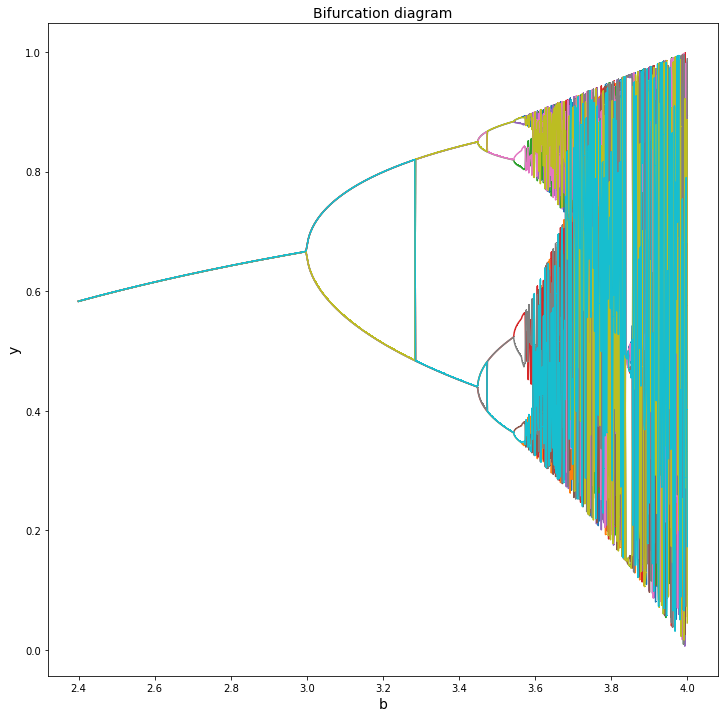

In [165]:
fig, axes = plt.subplots(figsize = (12,12))

# Set up axes and properties
axes.plot(b6, p6, marker = ',', markersize = 1)
axes.set_xlabel("b", fontsize=14)
axes.set_ylabel("y", fontsize=14)
titleString = "Bifurcation diagram"
axes.set_title(titleString, fontsize=14)

If we zoom in close at the graph we can see exactly what happens during choas

![4](https://i0.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-med1.png?w=613&ssl=1)

*(https://i0.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-med1.png?w=613&ssl=1)

![5](https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-narrow1.png?w=616&ssl=1)

*(https://i2.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-narrow1.png?w=616&ssl=1)

In the plot above, the bifurcations around growth rate 3.85 look a bit familiar. Let’s zoom in to the center one

![6](https://i0.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-fractal1.png?w=626&ssl=1)
*(https://i0.wp.com/geoffboeing.com/wp-content/uploads/2015/03/logistic-bifurcation-fractal1.png?w=626&ssl=1)

We see the exact same structure that we saw earlier at the macro-level! In fact, if we keep zooming infinitely in to this plot, we’ll keep seeing the same structure and patterns at smaller and smaller scales, infinitely. This is known as self-similarity. Does this self-similarity happen at random times? No, it doesn't, even choas follow a pattern. In 1975, Mitchell Feigenbaum discovered using the small HP-65 calculator that he had been issued, that the ratio of the difference between the values at which such successive period-doubling bifurcations occur tends to a constant of around $4.6692$. He was able to provide a mathematical proof of that fact, and he then showed that the same behavior, with the same mathematical constant, would occur within a wide class of mathematical functions, prior to the onset of chaos. In 1978 he applied the concept of Feigenbaum constant to logistic maps and found that self-similarity occur at a constant ratio of $4.6692$. This shows us that choas is not just a mess, it follows a pattern just like many mathematical equations except that it is extremely sensitive to adjusting it's variables.

*source6,7,8,9

## Conclusion

Models are essential to modern day science. Physicists, engineers, computer scientists, and economists use mathematical models most extensively but they are also used in the social science fields such as sociology and political science. Almost any real life scenario can be modeled mathematically and then anaylized in order to explain it's patterns. There is a certain degree of compromise in mathematical modeling since most interacting systems in the real world are far too complex to be fully modeled mathematically. We need to to identify and include only the most important parts of the system in the model. We also need to comprise the amount of mathematical manipulation which is worth computing. Therefore it is in our best intrest to use equations in their simplest form without leaving any necessary information out. Since we use computers to reprsent these models; we need to make sure that we are presenting these models elegantly and in a manner in which the reader can fully connect the real life application to it's model. 

In part 1 we discussed data analysis which is a process of applying statistics to organize, represent, describe, evaluate, and interpret data. It is the process of evaluating data using analytical and logical reasoning to examine each component of the data provided. We used least squares linear regression which is a linear approach to modeling the relationship between a dependent variable and one or more independent variables by squaring the residuals and minimizing their sum to be the least possible value. Using these methods we found a fitted (predicitive) model which if additional values are collected without an accompanying result, the fitted model can be used to make a prediction of the response.   $\beta_0$ and $\beta_1$ are the coefficients in the linear fit between $y$ and $t^2$ where $\beta$ represents the parameters of the predictive model $y=\beta _{0}+\beta _{1}t^2$. We fitted to the line to the appropriate graph and extracted the value of gravity by manipulating the free fall equation $$ y=\frac{1}{2}gt^2 $$

In part 2 we discussed logistic maps and how Robert May popularized logistic maps in 1976 by talking about population growth and how it eventually evolves into choas. The fact that May's simple population growth equation contains unexpectedly rich and complex behavior into how populations breed made it a very interesting topic to be further researched and developed. The discrete time model which iterates through a population of a species is given by

$$y_{n+1}=by_n(1-y_n)$$

We discussed how different values of the fertility rate $b$ effect the population $y$

$0 ≤ b ≤ 1 $ corresponds to the population dying off at the fixed point:$y=0$

$1 ≤ b ≤ 3 $ corresponds to the population saturating to the fixed point:$y=1-\frac{1}{b}$

$3 ≤ b ≤ 3.2 $ corresponds to the population bifurcating into a two cycle 

$3.2 ≤ b ≤ 3.56 $ corresponds to the population bifurcating into a four cycle

$3.56 ≤ b ≤ 4 $ corresponds to the population showing choatic behavior

We talked about how bifurcation is the division of something into two branches or parts and how it repeatedly happens in logisitc maps. Finally, we dived into the details of choas using the bifurcation diagram and came to the conclusion that even choas follows a pattern, shown by the Feigenbaum constant, and that it can be modeled mathematically just like almost everything else in the world. 

I found this project extrememly interesting and relevent to my studies since actuaries serve an important role with predictive analytics by using modeling and data analysis techniques to predict the future. Data analysts can be found in many types of private and public sector organizations, while actuaries work in the insurance industry. They use similar analytical methods to those used by data analysts, but actuaries' work focuses on the financial losses associated with accidents, illnesses and natural disasters. They then work with businesses and other clients to develop policies that minimize these risks. By assessing the costs associated with risks, actuaries help insurance carriers to design coverage and estimate the premiums that should be charged.

## Works cited 

1: https://www.spcforexcel.com/knowledge/root-cause-analysis/linear-regression-part-1

2: https://people.maths.bris.ac.uk/~madjl/course_text.pdf

3: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/

4: https://en.wikipedia.org/wiki/Linear_regression

5: https://en.wikipedia.org/wiki/Linear_least_squares

6: http://arslanranjha.weebly.com/uploads/4/8/9/3/4893701/nonlinear-dynamics-and-chaos-strogatz.pdf

7: https://geoffboeing.com/2015/03/chaos-theory-logistic-map/

8: http://mathworld.wolfram.com/LogisticMap.html

9: https://en.wikipedia.org/wiki/Mitchell_Feigenbaum